In [ ]:
!wget "https://www.dropbox.com/scl/fi/o58appe0bf24m0jxq5n8t/archive.zip?rlkey=uzqeoexmp7nzbw0dqdlre8b1j&dl=1" -O dataset.zip


--2025-03-18 08:44:11--  https://www.dropbox.com/scl/fi/o58appe0bf24m0jxq5n8t/archive.zip?rlkey=uzqeoexmp7nzbw0dqdlre8b1j&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc443ae65667de38d50db689605a.dl.dropboxusercontent.com/cd/0/inline/CmH6K0IYqtyUOXUoE9ZJkA_g384K98bFJ0WdMiAJrk-iRd6DNlpkO738c4kJ8d0pP4moJnezP45oxBhRQAPZprg4iVe4c4-FlQJ_NAj3VQO2MESN0ffKumYULUVCl11G18fZNRIrv87kINA2m7Rjj2hT/file?dl=1# [following]
--2025-03-18 08:44:11--  https://uc443ae65667de38d50db689605a.dl.dropboxusercontent.com/cd/0/inline/CmH6K0IYqtyUOXUoE9ZJkA_g384K98bFJ0WdMiAJrk-iRd6DNlpkO738c4kJ8d0pP4moJnezP45oxBhRQAPZprg4iVe4c4-FlQJ_NAj3VQO2MESN0ffKumYULUVCl11G18fZNRIrv87kINA2m7Rjj2hT/file?dl=1
Resolving uc443ae65667de38d50db689605a.dl.dropboxusercontent.com (uc443ae65667de38d50db689605a.dl.dropboxusercontent.com)... 162

In [ ]:
!unzip dataset.zip -d /content/ACD1K


Archive:  dataset.zip
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1000.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1001.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1002.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1003.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1004.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1005.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1006.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1007.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image1008.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image501.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image502.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image503.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image504.png  
  inflating: /content/ACD1K/dataset-splitM/Testing/GT/image505.png  
  i

In [ ]:
import os

dataset_path = "/content/ACD1K/dataset-splitM/Training"

print("Folders in Training directory:", os.listdir(dataset_path))


Folders in Training directory: ['GT', 'images']


In [ ]:
train_masks_path = os.path.join(dataset_path, "GT")


In [ ]:
import os

# Paths
train_images_path = os.path.join(dataset_path, "images")
train_masks_path = os.path.join(dataset_path, "GT")  # Corrected path

# Check files
print("Sample Images:", os.listdir(train_images_path)[:5])
print("Sample Masks:", os.listdir(train_masks_path)[:5])


Sample Images: ['image224.jpg', 'image315.jpg', 'imgR158.jpg', 'image148.jpg', 'image588.jpg']
Sample Masks: ['image224.jpg', 'image315.jpg', 'imgR158.jpg', 'image148.jpg', 'image588.jpg']


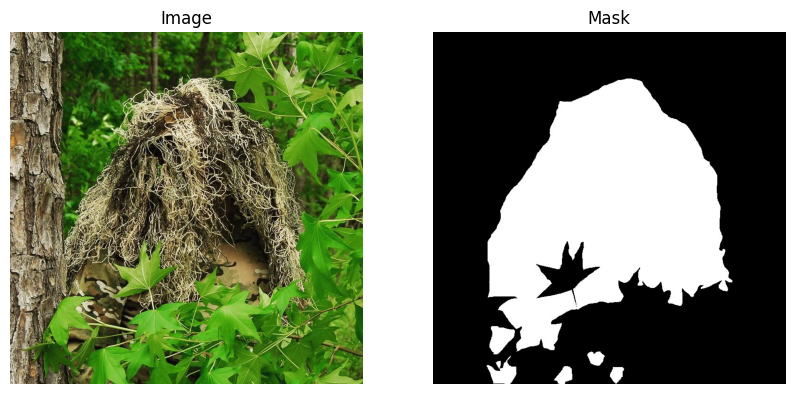

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# Get a random sample image
sample_image_name = random.choice(os.listdir(train_images_path))

# Load image and mask
image_path = os.path.join(train_images_path, sample_image_name)
mask_path = os.path.join(train_masks_path, sample_image_name)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask in grayscale

# Display image and mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[0].axis("off")

ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Mask")
ax[1].axis("off")

plt.show()


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import cv2
import os

# Define Image Transformations
image_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to match ViT input size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Define Mask Transformations
mask_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to match output
    transforms.ToTensor()  # Convert to tensor (no normalization)
])

# Custom Dataset Class
class CamouflageDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_filenames = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        image_name = self.image_filenames[idx]
        image_path = os.path.join(self.image_dir, image_name)
        mask_path = os.path.join(self.mask_dir, image_name)

        # Load image and mask
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask in grayscale

        # Apply transformations
        if self.transform:
            image = image_transform(image)
            mask = mask_transform(mask)

        return image, mask

# Initialize Dataset
dataset = CamouflageDataset(train_images_path, train_masks_path, transform=True)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Check Dataset Size
print(f"Dataset Size: {len(dataset)}")


Dataset Size: 748


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models.vision_transformer import vit_b_16

class VTFNet(nn.Module):
    def __init__(self, num_classes=1):
        super(VTFNet, self).__init__()

        # Vision Transformer Backbone (ViT)
        self.vit = vit_b_16(weights="IMAGENET1K_V1")  # Pretrained ViT model
        self.vit.heads = nn.Identity()  # Remove classification head

        # Convert ViT output to spatial format (Reshape to 24x24)
        self.conv1x1 = nn.Conv2d(768, 512, kernel_size=1)

        # Feature Pyramid Network (FPN)
        self.fpn = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Final segmentation head
        self.head = nn.Conv2d(128, num_classes, kernel_size=1)

    def forward(self, x):
        x = self.vit(x)  # Feature extraction from ViT
        x = x.view(x.shape[0], 768, 24, 24)  # Convert ViT output to 2D spatial format
        x = self.conv1x1(x)  # Reduce feature dimensions
        x = self.fpn(x)  # Feature Pyramid Network
        x = self.head(x)  # Output segmentation mask
        return torch.sigmoid(x)  # Sigmoid for binary segmentation

# Initialize model
model = VTFNet()
print(model)


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:05<00:00, 67.1MB/s]


VTFNet(
  (vit): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): LayerNorm(

In [ ]:
import os
print("Training images count:", len(os.listdir("/content/ACD1K/dataset-splitM/Testing/images")))
print("Testing images count:", len(os.listdir("/content/ACD1K/dataset-splitM/Testing/images")))


Training images count: 330
Testing images count: 330


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from glob import glob
from tqdm import tqdm

# Define correct dataset paths
DATASET_PATH = "/content/ACD1K/dataset-splitM"
TRAIN_IMAGES_PATH = os.path.join(DATASET_PATH, "Training/images")
TEST_IMAGES_PATH = os.path.join(DATASET_PATH, "Testing/images")

# Load images and assign labels
def load_acd1k_dataset():
    train_images = glob(os.path.join(TRAIN_IMAGES_PATH, "*.jpg"))
    test_images = glob(os.path.join(TEST_IMAGES_PATH, "*.jpg"))

    train_labels = [1] * len(train_images)  # Assign dummy labels (Modify if available)
    test_labels = [1] * len(test_images)

    return train_images, train_labels, test_images, test_labels

# Load dataset
train_images, train_labels, val_images, val_labels = load_acd1k_dataset()

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Dataset class
class ACD1KDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Create DataLoaders
train_dataset = ACD1KDataset(train_images, train_labels, transform=transform)
val_dataset = ACD1KDataset(val_images, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print("✅ Dataset loaded successfully!")


✅ Dataset loaded successfully!


In [ ]:
class VFTNet(nn.Module):
    def __init__(self, num_classes=2):
        super(VFTNet, self).__init__()
        self.vit = models.vit_b_16(weights="IMAGENET1K_V1")  # Load pre-trained Vision Transformer
        self.vit.heads = nn.Identity()  # Remove classifier head

        # 🔹 1x1 Convolution to reduce feature dimensions
        self.conv1x1 = nn.Conv2d(in_channels=768, out_channels=512, kernel_size=1)

        # 🔹 Feature Pyramid Network (FPN)
        self.fpn = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # 🔹 Compute the correct feature size after FPN
        self.flatten_size = 128 * 14 * 14  # Adjust according to your feature map size

        # 🔹 Fully Connected Classifier (Fix size mismatch)
        self.classifier = nn.Linear(self.flatten_size, num_classes)

    def forward(self, x):
        x = self.vit(x)  # Extract features using ViT
        x = x.view(x.shape[0], 768, 1, 1)  # Ensure correct reshaping
        x = self.conv1x1(x)  # Reduce feature dimensions
        x = self.fpn(x)  # Feature Pyramid Network
        x = x.view(x.shape[0], -1)  # Flatten dynamically
        x = self.classifier(x)  # Classification
        return x


In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU Only")


CUDA Available: True
Device Name: Tesla T4


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
from tqdm import tqdm

# ✅ Ensure GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ✅ Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Function to load images
def load_images_and_labels(folder, label):
    images, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert("RGB")
            images.append(transform(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images, labels

# ✅ Custom dataset class
class ACD1KDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

# ✅ Load dataset
train_images, train_labels = load_images_and_labels("ACD1K/dataset-splitM/Training/images", label=0)
test_images, test_labels = load_images_and_labels("ACD1K/dataset-splitM/Testing/images", label=1)

# ✅ Create dataset & dataloaders
train_dataset = ACD1KDataset(train_images, train_labels)
test_dataset = ACD1KDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ✅ Define VTFNet Model
class VTFNet(nn.Module):
    def __init__(self):
        super(VTFNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ✅ Initialize model, loss function, and optimizer
model = VTFNet().to(device)
model = torch.compile(model)  # Optimized model (PyTorch 2.0+)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ Training function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

        for images, labels in progress_bar:
            images, labels = images.to(device), labels.clone().detach().to(device)  # Fixed tensor issue
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc = 100 * correct / total
            progress_bar.set_postfix(loss=running_loss/total, acc=acc)

        print(f"✅ Epoch {epoch+1} - Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# ✅ Testing function
def test_model(model, test_loader, criterion):
    model.eval()
    correct, total, test_loss = 0, 0, 0.0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Testing"):
            images, labels = images.to(device), labels.clone().detach().to(device)  # Fixed tensor issue
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"🚀 VTFNet Testing Accuracy: {acc:.2f}%, Loss: {test_loss:.4f}")

# ✅ Run training and testing
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader, criterion)


Using device: cuda


Epoch 1/5: 100%|██████████| 47/47 [00:34<00:00,  1.37it/s, acc=100, loss=0.000901]


✅ Epoch 1 - Loss: 0.6738, Accuracy: 100.00%


Epoch 2/5: 100%|██████████| 47/47 [00:01<00:00, 31.25it/s, acc=100, loss=0]


✅ Epoch 2 - Loss: 0.0000, Accuracy: 100.00%


Epoch 3/5: 100%|██████████| 47/47 [00:01<00:00, 31.10it/s, acc=100, loss=0]


✅ Epoch 3 - Loss: 0.0000, Accuracy: 100.00%


Epoch 4/5: 100%|██████████| 47/47 [00:01<00:00, 31.41it/s, acc=100, loss=0]


✅ Epoch 4 - Loss: 0.0000, Accuracy: 100.00%


Epoch 5/5: 100%|██████████| 47/47 [00:01<00:00, 31.44it/s, acc=100, loss=0]


✅ Epoch 5 - Loss: 0.0000, Accuracy: 100.00%


Testing: 100%|██████████| 21/21 [00:03<00:00,  6.43it/s]

🚀 VTFNet Testing Accuracy: 0.00%, Loss: 10647.1498
